# 单变量线性回归

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 注意pd.read_csv的使用方法

In [2]:
path = "ex1data1.txt"
data = pd.read_csv(path, header = None, names=['Poputation', 'Profit'])
data.head()

,Poputation,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [3]:
data.describe()

,Poputation,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


### 可视化数据（plot，散点图查看）

In [4]:
data.plot(kind="scatter",x='Poputation',y='Profit',figsize=(12,6))

# 1.2 数据可视化

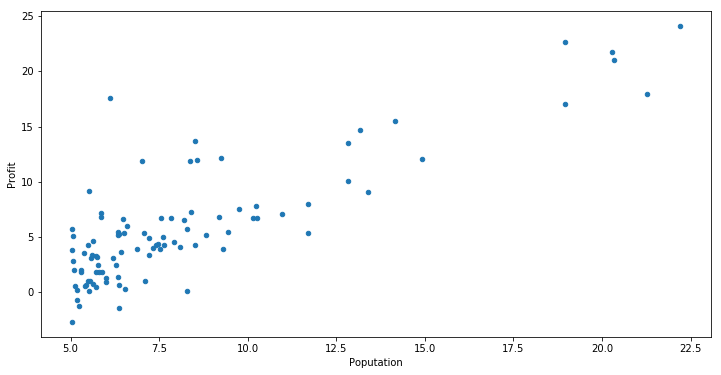

In [5]:
plt.show()

# 1.2 梯度下降的实现

**首先创建一个以θ为特征函数的代价函数;**
$$J\left( \theta  \right)=\frac{1}{2m}\sum\limits_{i=1}^{m}{{{\left( {{h}_{\theta }}\left( {{x}^{(i)}} \right)-{{y}^{(i)}} \right)}^{2}}}$$
多变量的假设 h 表示为：\\[{{h}_{\theta }}\left( x \right)={{\theta }_{0}}+{{\theta }_{1}}{{x}_{1}}+{{\theta }_{2}}{{x}_{2}}+...+{{\theta }_{n}}{{x}_{n}}\\] 
这个公式中有n+1个参数和n个变量，为了使得公式能够简化一些，引入${{x}_{0}}=1$，则公式转化为：  
此时模型中的参数是一个n+1维的向量，任何一个训练实例也都是n+1维的向量，特征矩阵X的维度是 m*(n+1)。 因此公式可以简化为：${{h}_{\theta }}\left( x \right)={{\theta }^{T}}X$，其中上标T代表矩阵转置。
则有：\\[{{h}_{\theta }}\left( x \right)={{\theta }^{T}}X={{\theta }_{0}}{{x}_{0}}+{{\theta }_{1}}{{x}_{1}}+{{\theta }_{2}}{{x}_{2}}+...+{{\theta }_{n}}{{x}_{n}}\\] 

In [6]:
def ComputeCost(X,y,theta):
    """X(m,n+1) y(m,1) theta(n+1,1)"""
    inner = np.power(((X @ theta)-y),2) # 得到的是 (m, 1)
    return np.sum(inner) / (2 * len(X))  # np,sum能将内部的元素加和。

**让我们在训练集中添加一列，以便我们可以使用向量化的解决方案来计算代价和梯度。**

In [7]:
data.insert(0, 'Ones', 1) # 插入到第零列
data.head()

,Ones,Poputation,Profit
0,1,6.1101,17.5920
1,1,5.5277,9.1302
2,1,8.5186,13.6620
3,1,7.0032,11.8540
4,1,5.8598,6.8233


**现在我们来做一些变量初始化**

In [8]:
# 设置训练特征（X）和目标变量（y）
cols = data.shape[1]     # 返回的是列数
X = data.iloc[:,0:cols-1] # X是所有的行，去掉最后一列
y = data.iloc[:,cols-1:cols] # y所有的行，最后一列

**观察X（训练集）和y（目标变量）的值是否正确**

In [9]:
X.head()

,Ones,Poputation
0,1,6.1101
1,1,5.5277
2,1,8.5186
3,1,7.0032
4,1,5.8598


In [10]:
y.head() # head 是观察前5行

,Profit
0,17.5920
1,9.1302
2,13.6620
3,11.8540
4,6.8233


In [11]:
type(y)

pandas.core.frame.DataFrame

可以看到是DataFrame类型的数据，这是pandas的特性能处理字符串。我们需要将其转换成numpy的数组进行计算（前面定义的代价函数是numpy数组）。

In [12]:
X = np.matrix(X.values)
y = np.matrix(y.values)
theta = np.array([[0],[0]]) 

theta是一个(2,1)的矩阵

In [13]:
theta

array([[0],
       [0]])

检查所有的维度

In [14]:
X.shape, theta.shape, y.shape

((97, 2), (2, 1), (97, 1))

**计算代价函数**

In [15]:
ComputeCost(X,y,theta) # 返回theta的值

32.072733877455676

## 1.3 batch gradient decent (批量梯度下降)
$${{\theta }_{j}}:={{\theta }_{j}}-\alpha \frac{\partial }{\partial {{\theta }_{j}}}J\left( \theta  \right)$$
$${\theta_{0}}:={\theta_{0}}-a\frac{1}{m}\sum\limits_{i=1}^{m}{ \left({{h}_{\theta }}({{x}^{(i)}})-{{y}^{(i)}} \right)}$$
$${\theta_{1}}:={\theta_{1}}-a\frac{1}{m}\sum\limits_{i=1}^{m}{\left( \left({{h}_{\theta }}({{x}^{(i)}})-{{y}^{(i)}} \right)\cdot {{x}^{(i)}} \right)}$$
$$...$$

**先求梯度** 注意这个梯度的求法，在以后很多时候都是通用的。X（m,n+1）,y（m,1）,theta(n+1,1)

In [16]:
def Gradient(X,y,theta):
    """梯度的求解:和上式2,3可得"""
    m = X.shape[0]
    
    inner = X.T@(X @ theta - y)   # X.T(n+1,m) @ (X(m,n+1) @ (theta(n+1,1))) -> (n, 1) 得到 n 行 1 列数据。
    
    return inner / m

**现在来定义批量梯度下降**

In [17]:
def Batch_gradient_descent(X, y, theta, epoch, alpha=0.01):
    """
    拟合线性回归，返回参数和代价
    epoch:要处理的的迭代次数
    
    """
    
    # 代价函数的初始化
    cost_data = [ComputeCost(X, y, theta)]
    _theta = theta.copy() # 拷贝一份，不和原来的theta混淆
    
    # 进行同步迭代
    for i in range(epoch):
        _theta = _theta - alpha * Gradient(X, y, _theta)
        cost_data.append(ComputeCost(X, y, _theta))
        
    return _theta, cost_data

In [18]:
final_theta, cost_data = Batch_gradient_descent(X, y, theta, epoch = 500) 

**最终得到的theta(迭代500步)**

In [19]:
final_theta

matrix([[-2.28286727],
        [ 1.03099898]])

**迭代500步过程中的代价函数的变化**

In [20]:
cost_data

[32.072733877455676,
 6.737190464870006,
 5.931593568604956,
 5.901154707081388,
 5.895228586444221,
 5.89009494311733,
 5.885004158443647,
 5.879932480491418,
 5.874879094762575,
 5.869843911806386,
 5.8648268653129305,
 5.859827889932181,
 5.85484692057229,
 5.849883892376588,
 5.844938740722034,
 5.840011401218361,
 5.8351018097072265,
 5.830209902261388,
 5.825335615183863,
 5.820478885007099,
 5.815639648492154,
 5.810817842627869,
 5.806013404630044,
 5.801226271940628,
 5.796456382226899,
 5.791703673380653,
 5.786968083517396,
 5.782249550975539,
 5.777548014315596,
 5.772863412319381,
 5.768195683989212,
 5.76354476854712,
 5.758910605434049,
 5.754293134309077,
 5.749692295048629,
 5.745108027745684,
 5.740540272709014,
 5.735988970462381,
 5.731454061743792,
 5.726935487504702,
 5.722433188909257,
 5.717947107333528,
 5.713477184364749,
 5.709023361800549,
 5.704585581648199,
 5.700163786123856,
 5.695757917651815,
 5.691367918863752,
 5.68699373259798,
 5.682635301898707,
 

**最终得到的代价**

In [21]:
ComputeCost(X, y, final_theta)  # or cost_data[-1]

4.713809531116866

**代价数据可视化**

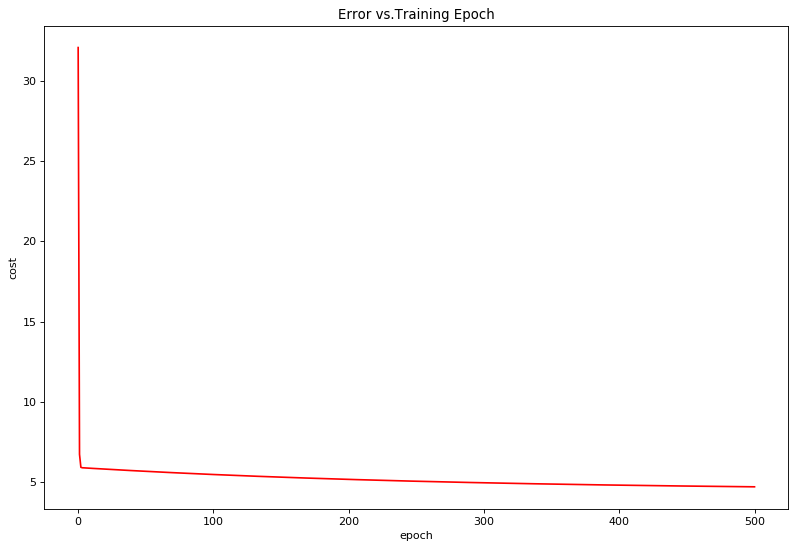

In [22]:
fig = plt.figure(figsize=(12,8),dpi=80)
plt.plot(np.arange(501), cost_data, 'r')
plt.xlabel("epoch")
plt.ylabel("cost")
# plt.xticks(np.arange(501)[0:])
plt.title("Error vs.Training Epoch")
plt.show()

**绘制线性拟合数据**

In [23]:
data.head()

,Ones,Poputation,Profit
0,1,6.1101,17.5920
1,1,5.5277,9.1302
2,1,8.5186,13.6620
3,1,7.0032,11.8540
4,1,5.8598,6.8233


In [24]:
final_theta[1]

matrix([[1.03099898]])

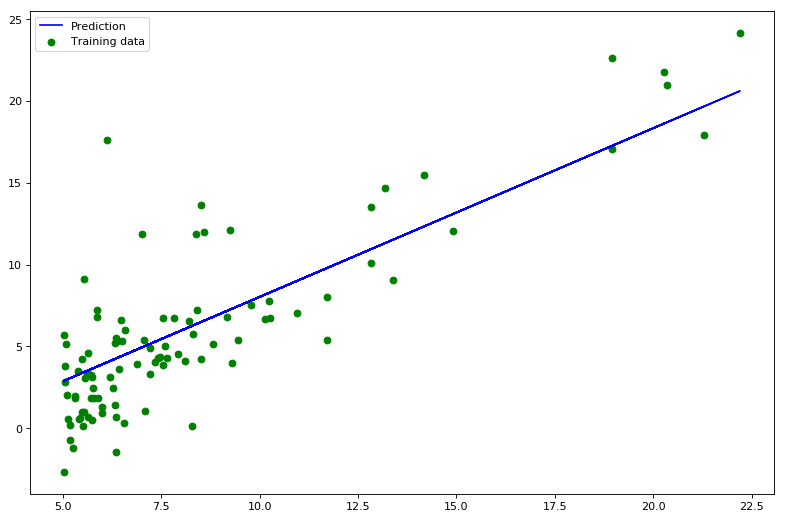

In [25]:
b = final_theta[0, 0] # intercept，Y轴上的截距,注意数据的读取方式
a = final_theta[1, 0] # slope，斜率

fig = plt.figure(figsize=(12,8),dpi=80)
plt.scatter(data.Poputation, data.Profit, color='green', label="Training data")
plt.plot(data.Poputation, data.Poputation*a + b,color='blue', label="Prediction")
plt.legend(loc=2)
plt.show()

# 2.选修章节

## 2.1多变量批量线性回归

In [26]:
data2 = pd.read_csv('ex1data2.txt', names=['square', 'bedrooms','price'])
data2.head()

,square,bedrooms,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


### 标准化数据，这个多了一个步骤，特征归一化

In [27]:
def normalize_feature(df):
#     """Applies function along input axis(default 0) of DataFrame."""
    return df.apply(lambda column: (column - column.mean()) / column.std())

In [28]:
data2 = normalize_feature(data2)
data2.head()

,square,bedrooms,price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


** 然后进行多变量多批量梯度下降 **


In [29]:
# add ones column
data2.insert(0, 'Ones', 1)

# set X (training data) and y (target variable)
cols = data2.shape[1]
X2 = data2.iloc[:,0:cols-1]
y2 = data2.iloc[:,cols-1:cols]

# convert to matrices and initialize theta
X2 = np.matrix(X2.values)
y2 = np.matrix(y2.values)
theta2 = np.matrix([[0],[0],[0]])

# perform linear regression on the data set
theta2, cost2 = Batch_gradient_descent(X2, y2, theta2, epoch=500)

# get the cost (error) of the model
ComputeCost(X2, y2, theta2)

0.13195133775794732

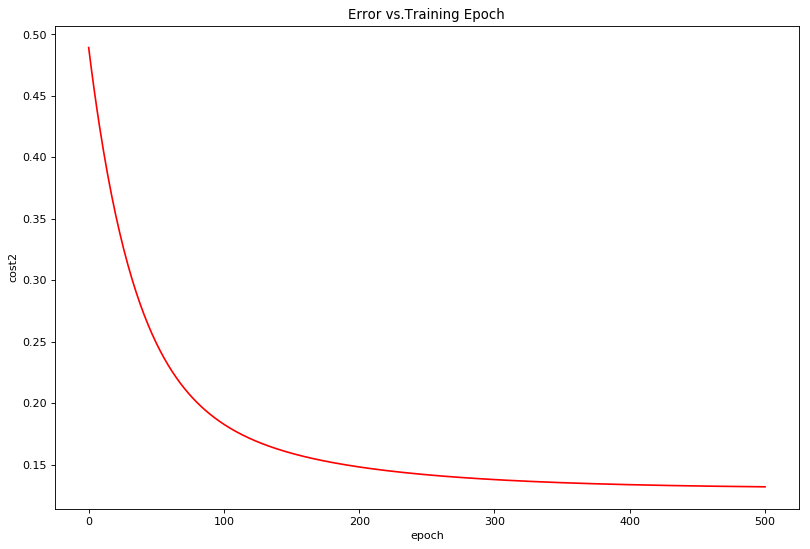

In [30]:
fig = plt.figure(figsize=(12,8),dpi=80)
plt.plot(np.arange(501), cost2, 'r')
plt.xlabel("epoch")
plt.ylabel("cost2")
plt.title("Error vs.Training Epoch")
# plt.grid(True)
plt.show()

In [31]:
cost2

[0.48936170212765967,
 0.4805491041076719,
 0.47198587701203876,
 0.46366461618706284,
 0.4555781400525299,
 0.44771948335326117,
 0.4400818906150644,
 0.43265880979889004,
 0.42544388614718714,
 0.41843095621663473,
 0.4116140420916036,
 0.4049873457728717,
 0.39854524373628347,
 0.3922822816562035,
 0.38619316928877434,
 0.3802727755101314,
 0.3745161235048873,
 0.36891838610032585,
 0.36347488124189714,
 0.3581810676057273,
 0.353032540343996,
 0.34802502695915444,
 0.3431543833030803,
 0.33841658969738386,
 0.3338077471711977,
 0.3293240738128865,
 0.32496190123222946,
 0.32071767112972566,
 0.3165879319697778,
 0.3125693357546089,
 0.3086586348958572,
 0.3048526791808924,
 0.301148412830983,
 0.29754287164853055,
 0.2940331802506765,
 0.290616549386659,
 0.2872902733363892,
 0.28405172738778034,
 0.2808983653904495,
 0.2778277173834725,
 0.2748373872949541,
 0.27192505071123485,
 0.26908845271362497,
 0.26632540578062164,
 0.26363378775362334,
 0.2610115398642198,
 0.2584566648211

In [32]:
theta2

matrix([[-1.17358841e-16],
        [ 8.30383883e-01],
        [ 8.23982853e-04]])

## 2.2 学习率

In [33]:
base = np.logspace(-3, -6, num=4)
candidate = np.sort(np.concatenate((base, base*3)))
print(candidate)

[1.e-06 3.e-06 1.e-05 3.e-05 1.e-04 3.e-04 1.e-03 3.e-03]


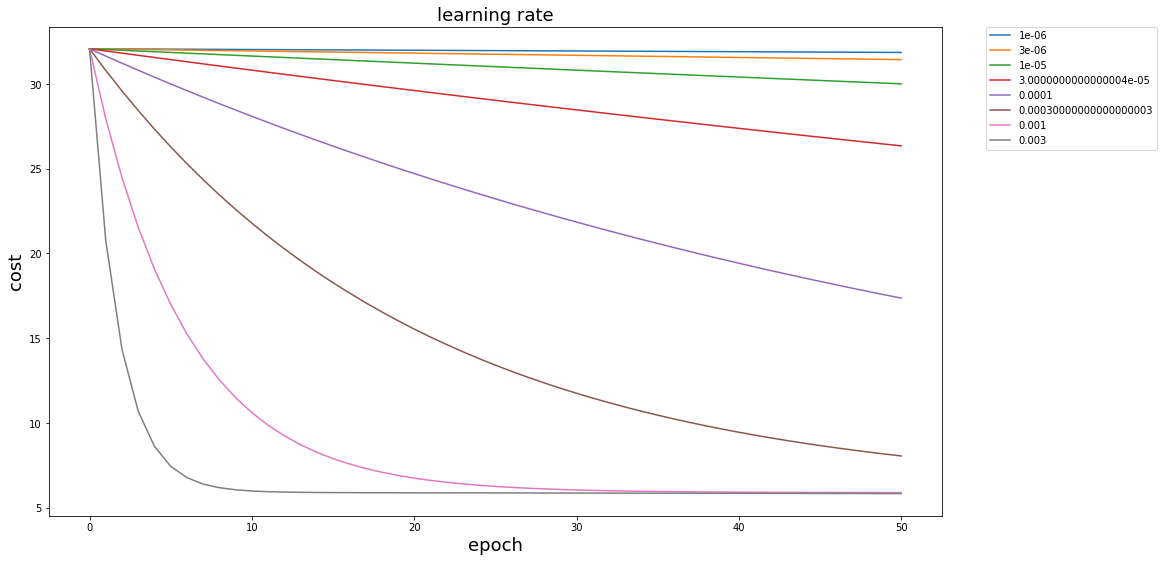

In [34]:
epoch=50

fig, ax = plt.subplots(figsize=(16, 9))

for alpha in candidate:
    _, cost_data = Batch_gradient_descent(X, y,theta, epoch=50, alpha=alpha)
    ax.plot(np.arange(epoch+1), cost_data, label=alpha)

ax.set_xlabel('epoch', fontsize=18)
ax.set_ylabel('cost', fontsize=18)
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.set_title('learning rate', fontsize=18)
plt.show()

## 2.3 normal equation（正规方程）
正规方程是通过求解下面的方程来找出使得代价函数最小的参数的：$\frac{\partial }{\partial {{\theta }_{j}}}J\left( {{\theta }_{j}} \right)=0$ 。
 假设我们的训练集特征矩阵为 X（包含了${{x}_{0}}=1$）并且我们的训练集结果为向量 y，则利用正规方程解出向量 $\theta ={{\left( {{X}^{T}}X \right)}^{-1}}{{X}^{T}}y$ 。
上标T代表矩阵转置，上标-1 代表矩阵的逆。设矩阵$A={{X}^{T}}X$，则：${{\left( {{X}^{T}}X \right)}^{-1}}={{A}^{-1}}$

梯度下降与正规方程的比较：

梯度下降：需要选择学习率α，需要多次迭代，当特征数量n大时也能较好适用，适用于各种类型的模型	

正规方程：不需要选择学习率α，一次计算得出，需要计算${{\left( {{X}^{T}}X \right)}^{-1}}$，如果特征数量n较大则运算代价大，因为矩阵逆的计算时间复杂度为O(n3)，通常来说当n小于10000 时还是可以接受的，只适用于线性模型，不适合逻辑回归模型等其他模型

In [35]:
# 正规方程
def normalEqn(X, y):
    theta = np.linalg.inv(X.T @ X ) @ X.T@ y # X.T@X等价于X.T.dot(X)
    return theta

In [36]:
final_theta2=normalEqn(X, y)#感觉和批量梯度下降的theta的值有点差距(迭代次数不够？还是学习率太大？)
final_theta2

matrix([[-3.89578088],
        [ 1.19303364]])